# WeatherPy
----

#### Weather analysis of around 500 ramdon cities around the world to showcase the relationship between city latitud and 4 weather data points: Temperature, Humidity, Cloudiness and Wind Speed.

- Comparing the latitud with the maximum temperatures we can tell cities closer to Latitud 0 (Equator) have higher teamperatures.
- Analyzing latitud and wind speed, we call tell despite the latitud of the city the wind speed for most cities is in the range of 0 to 6 mph.
- The analysis shows that cities in the Northern hemisphere show a trend of having larger humidity points as cities location get closes to the north pole. For the Southern hemisphere there is not a strong correlation with the humidity.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [3]:
cities

['charters towers',
 'yola',
 'jacmel',
 'pec',
 'vakhrushevo',
 'hamilton',
 'karratha',
 'saint-philippe',
 'new norfolk',
 'inderborskiy',
 'oranjemund',
 'diffa',
 'ponta do sol',
 'pringsewu',
 'east london',
 'lasa',
 'colquechaca',
 'aktash',
 'carnarvon',
 'atuona',
 'lae',
 'puerto ayora',
 'mezen',
 'thompson',
 'longyearbyen',
 'faanui',
 'tuktoyaktuk',
 'cidreira',
 'jalu',
 'puerto escondido',
 'souillac',
 'mataura',
 'chokurdakh',
 'valparaiso',
 'khatanga',
 'kruisfontein',
 'gornopravdinsk',
 'punta arenas',
 'port alfred',
 'dibrugarh',
 'hithadhoo',
 'bluff',
 'praia',
 'mahanoro',
 'rikitea',
 'amderma',
 'pochutla',
 'hermanus',
 'kayerkan',
 'coolum beach',
 'primero de enero',
 'narsaq',
 'les cayes',
 'taolanaro',
 'haines junction',
 'cape town',
 'ushuaia',
 'aswan',
 'robertsport',
 'upernavik',
 'namwala',
 'vao',
 'hobart',
 'nikolskoye',
 'chuy',
 'castro',
 'amapa',
 'jamestown',
 'belushya guba',
 'busselton',
 'carbonia',
 'tabas',
 'nanortalik',
 'kapa

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Create Cities dataframe with list pulled from citipy
cities_df = pd.DataFrame({'City':cities})
cities_df.head()

,City
0,charters towers
1,yola
2,jacmel
3,pec
4,vakhrushevo


In [5]:
#Add columns to df to fill out
cities_df['Cloudiness'] = ""
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df['Humidity'] = ""
cities_df['Lat'] = ""
cities_df['Lng'] = ""
cities_df['Max Temp'] = ""
cities_df['Wind Speed'] = ""

cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,charters towers,,,,,,,,
1,yola,,,,,,,,
2,jacmel,,,,,,,,
3,pec,,,,,,,,
4,vakhrushevo,,,,,,,,


In [6]:
#Build API URL to get data from open weather
base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {
    "units": "imperial",
    "appid": weather_api_key,
}
#iterrows to iterate through pandas city dataframe
for index, row in cities_df.iterrows():

    #Get city from cities dataframe
    city = row['City']

    #Add q parameter to params dict
    params['q'] = city

    #Build url and API request
    print(f"Processing record {index}: {city}.")
    response = requests.get(base_url, params=params).json()
    
    try:
        #Fill out cities df with data from API
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Lng'] = response['coord']['lon']
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
    except (KeyError, IndexError):
        print("Missing result, skipping.")
        
    print("------------")

Processing record 0: charters towers.
------------
Processing record 1: yola.
------------
Processing record 2: jacmel.
------------
Processing record 3: pec.
------------
Processing record 4: vakhrushevo.
------------
Processing record 5: hamilton.
------------
Processing record 6: karratha.
------------
Processing record 7: saint-philippe.
------------
Processing record 8: new norfolk.
------------
Processing record 9: inderborskiy.
Missing result, skipping.
------------
Processing record 10: oranjemund.
------------
Processing record 11: diffa.
------------
Processing record 12: ponta do sol.
------------
Processing record 13: pringsewu.
------------
Processing record 14: east london.
------------
Processing record 15: lasa.
------------
Processing record 16: colquechaca.
------------
Processing record 17: aktash.
------------
Processing record 18: carnarvon.
------------
Processing record 19: atuona.
------------
Processing record 20: lae.
------------
Processing record 21: puerto 

------------
Processing record 174: kalevala.
------------
Processing record 175: kaitangata.
------------
Processing record 176: bagdarin.
------------
Processing record 177: ancud.
------------
Processing record 178: cam ranh.
------------
Processing record 179: marzuq.
------------
Processing record 180: yerofey pavlovich.
------------
Processing record 181: sampit.
------------
Processing record 182: tambopata.
------------
Processing record 183: goderich.
------------
Processing record 184: barentsburg.
Missing result, skipping.
------------
Processing record 185: lixourion.
------------
Processing record 186: sterling.
------------
Processing record 187: atar.
------------
Processing record 188: samusu.
Missing result, skipping.
------------
Processing record 189: kahului.
------------
Processing record 190: arraial do cabo.
------------
Processing record 191: taltal.
------------
Processing record 192: lebu.
------------
Processing record 193: belmonte.
------------
Processing r

------------
Processing record 342: loveland.
------------
Processing record 343: kosh-agach.
------------
Processing record 344: zhanatas.
Missing result, skipping.
------------
Processing record 345: bathsheba.
------------
Processing record 346: yelizovo.
------------
Processing record 347: mareeba.
------------
Processing record 348: chau doc.
------------
Processing record 349: lerik.
------------
Processing record 350: amarante do maranhao.
------------
Processing record 351: hihifo.
Missing result, skipping.
------------
Processing record 352: ilhabela.
------------
Processing record 353: zhanaozen.
------------
Processing record 354: higuey.
Missing result, skipping.
------------
Processing record 355: cassilandia.
------------
Processing record 356: vardo.
------------
Processing record 357: bejar.
------------
Processing record 358: washougal.
------------
Processing record 359: visby.
------------
Processing record 360: segezha.
------------
Processing record 361: dossor.
--

Missing result, skipping.
------------
Processing record 512: safwah.
Missing result, skipping.
------------
Processing record 513: palmer.
------------
Processing record 514: sorvag.
Missing result, skipping.
------------
Processing record 515: ploemeur.
------------
Processing record 516: petropavlovsk-kamchatskiy.
------------
Processing record 517: louisbourg.
Missing result, skipping.
------------
Processing record 518: znamenskoye.
------------
Processing record 519: pilao arcado.
Missing result, skipping.
------------
Processing record 520: bilma.
------------
Processing record 521: laguna.
------------
Processing record 522: moose factory.
------------
Processing record 523: sistranda.
------------
Processing record 524: karasjok.
------------
Processing record 525: san isidro.
------------
Processing record 526: luba.
------------
Processing record 527: hicaque.
------------
Processing record 528: gizo.
------------
Processing record 529: ruwi.
------------
Processing record 5

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Remove records with no data
cities_df=cities_df.loc[cities_df['Country']!='']

#Export clean cities df to CSV
cities_df.to_csv(output_data_file, index=True, index_label='City_ID')

In [8]:
#Display cities df
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,charters towers,15,AU,1603323403,45,-20.1,146.27,84.22,11.92
1,yola,30,NG,1603323472,64,9.2,12.48,77.59,3.91
2,jacmel,75,HT,1603323211,83,18.23,-72.53,78.8,5.82
3,pec,36,XK,1603323473,46,42.66,20.29,37.4,1.9
4,vakhrushevo,40,RU,1603323473,80,55.23,61.72,30.2,8.95
...,...,...,...,...,...,...,...,...,...
616,hasaki,75,JP,1603323283,87,35.73,140.83,63,4.7
617,dwarka,0,IN,1603323697,66,22.24,68.97,81.54,8.66
618,urengoy,79,RU,1603323698,97,65.97,78.37,17.51,6.38
619,mahibadhoo,40,MV,1603323639,77,3.78,72.97,82.33,14.12


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

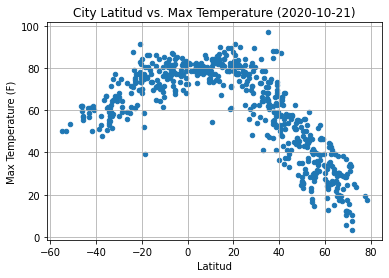

In [9]:
cities_df.plot(kind='scatter', x='Lat', y='Max Temp', grid=True)
plot_title=f"City Latitud vs. Max Temperature ({datetime.date.today()})"
plt.title(plot_title)
plt.xlabel("Latitud")
plt.ylabel("Max Temperature (F)")
plt.savefig(f'output_data/{plot_title}.png')
plt.show()

#### City Latitud vs Max Temperature Observations:
- By comparing the latitud with the max temperatures we can tell from the chart that **cities closer to Latitud 0 - Equator are higher** and as they go further gets colder.

#### Latitude vs. Humidity Plot

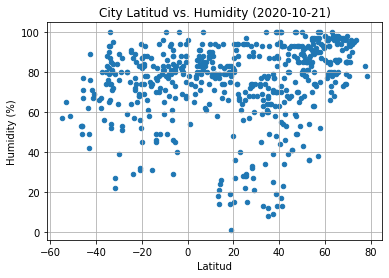

In [10]:
cities_df.plot(kind='scatter', x='Lat', y='Humidity', grid=True)
plot_title=f"City Latitud vs. Humidity ({datetime.date.today()})"
plt.title(plot_title)
plt.xlabel("Latitud")
plt.ylabel("Humidity (%)")
plt.savefig(f'output_data/{plot_title}.png')
plt.show()

#### City Latitud vs Humidity Observations:
- Looking the latitud and the humidity point, there is no clear correlation with the two data points, humidity points are all across all latitudes.

#### Latitude vs. Cloudiness Plot

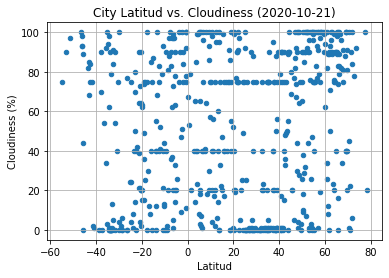

In [11]:
cities_df.plot(kind='scatter', x='Lat', y='Cloudiness', grid=True)
plot_title=f"City Latitud vs. Cloudiness ({datetime.date.today()})"
plt.title(plot_title)
plt.xlabel("Latitud")
plt.ylabel("Cloudiness (%)")
plt.savefig(f'output_data/{plot_title}.png')
plt.show()

#### City Latitud vs Cloudiness Observations:
- The analysis of latitud and cloudiness relationship doesn't show a clear correlation.

#### Latitude vs. Wind Speed Plot

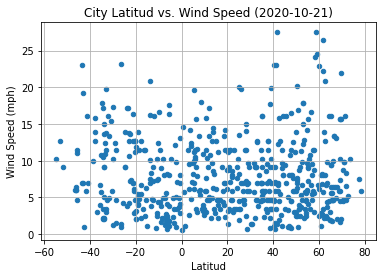

In [12]:
cities_df.plot(kind='scatter', x='Lat', y='Wind Speed', grid=True)
plot_title=f"City Latitud vs. Wind Speed ({datetime.date.today()})"
plt.title(plot_title)
plt.xlabel("Latitud")
plt.ylabel("Wind Speed (mph)")
plt.savefig(f'output_data/{plot_title}.png')
plt.show()

#### City Latitud vs Wind Speed Observations:
- Analyzing the latitud and wind speed, you can say that despite the latitud of the city the wind speed for most cities is in the range of 0 to 6 mph.

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots

#Create function for scatter plotter, passing x,y series and annotation location (x,y)
def linearPlot(x_series,y_series, x_ann, y_ann, hemisphere):
    #Assign x y values
    x_values = pd.to_numeric(x_series)
    y_values = pd.to_numeric(y_series)
    #Do calculations
    #Calculate linear regression model
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #Create plot
    plt.scatter(x_values,y_values, color='green')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_ann,y_ann),fontsize=12,color="red")
    plt.xlabel('Latitud')
    plt.ylabel(y_values.name)
    print(f"The r-squared is: {rvalue**2}")
    plot_title=f'{hemisphere} Hemisphere - Latitud vs. {y_values.name} ({datetime.date.today()})'
    plt.title(plot_title)
    plt.savefig(f'output_data/{plot_title}.png')
    plt.show()

In [14]:
# Create Northern and Southern Hemisphere DataFrames
#Nothern df
n_cities_df=cities_df.loc[cities_df['Lat'] >= 0]
#Southern df
s_cities_df=cities_df.loc[cities_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7884255934486187


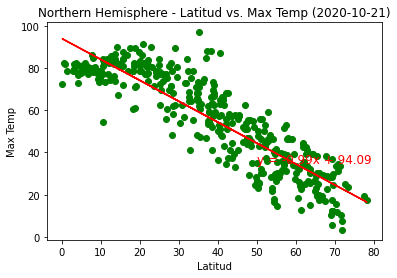

In [15]:
linearPlot(n_cities_df['Lat'],n_cities_df['Max Temp'],50,35,'Northern')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5176964435490046


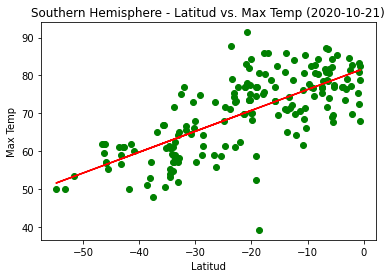

In [16]:
linearPlot(s_cities_df['Lat'],s_cities_df['Max Temp'],-50,35,'Southern')

### Observations by Hemisphere - Max Temp vs. Latitude:
- We can observe in the above charts that cities located closer to the equator have higher temperatures, and as they get close to the pholes temperatures get low.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06344853767808269


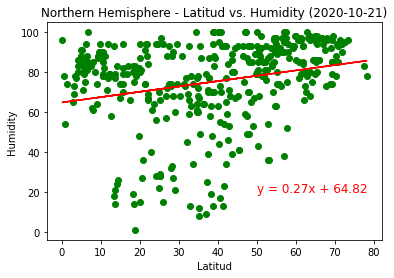

In [17]:
linearPlot(n_cities_df['Lat'],n_cities_df['Humidity'],50,20,'Northern')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04015045048820182


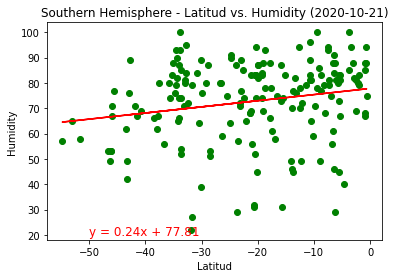

In [18]:
linearPlot(s_cities_df['Lat'],s_cities_df['Humidity'],-50,20,'Southern')

### Observations by Hemisphere - Humidity (%) vs. Latitude:
- The analysis shows that cities in the Northern hemisphere show a trend of having larger humidity points as cities location is more at the north. For the Southern hemisphere there is not a strong correlation with the humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04944842440233928


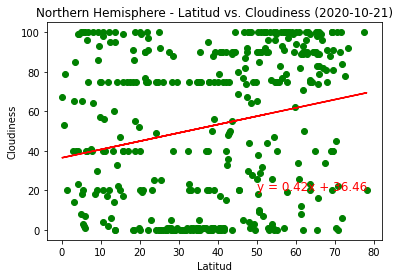

In [19]:
linearPlot(n_cities_df['Lat'],n_cities_df['Cloudiness'],50,20,'Northern')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.007350180180951917


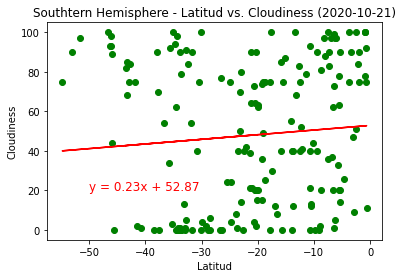

In [20]:
linearPlot(s_cities_df['Lat'],s_cities_df['Cloudiness'],-50,20,'Southtern')

### Observations by Hemisphere - Cloudiness (%) vs. Latitude:
- The analysis for cloudiness does not show a correlation that can help to conclude if cloudiness are affected the the city's locations.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0005839069192918745


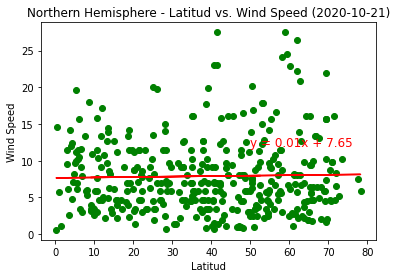

Mean: 7.889387755102041


In [21]:
linearPlot(n_cities_df['Lat'],n_cities_df['Wind Speed'],50,12,'Northern')
print(f"Mean: {n_cities_df['Wind Speed'].mean()}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0735053277571534


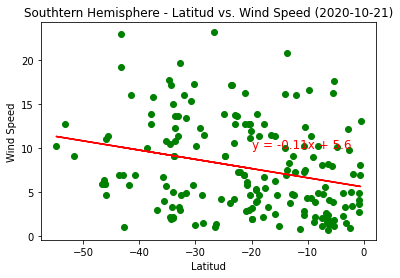

Mean: 7.808222222222225


In [22]:
linearPlot(s_cities_df['Lat'],s_cities_df['Wind Speed'],-20,10,'Southtern')
print(f"Mean: {s_cities_df['Wind Speed'].mean()}")

### Observations by Hemisphere - Wind Speed vs. Latitude:
- Wind speed analysis for Northern hemisphere shows mayority of cities shows an average of wind speed of 3.3 mph, but in the Southern chart we cannot say cities mapped follow under the same pattern.